## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [18]:
# Basic import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [19]:
df = pd.read_csv('data/stud.csv')

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and y variables

In [21]:
X = df.drop('math_score', axis = 1)

In [22]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [23]:
y = df['math_score']

In [24]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [25]:
print('Categories in Gender variable    :   ',df['gender'].unique())
print('Categories in race/ethnicity variable    :   ', df['race_ethnicity'].unique())
print('Categories in parental level of education variable   :   ', df['parental_level_of_education'].unique())
print('Categories in lunch variable    :   ', df['lunch'].unique())
print('Categories in test preparation course variable   :   ', df['test_preparation_course'].unique())


Categories in Gender variable    :    ['female' 'male']
Categories in race/ethnicity variable    :    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable   :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable    :    ['standard' 'free/reduced']
Categories in test preparation course variable   :    ['none' 'completed']


In [28]:
# Column transformer

num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# The OneHotEncoder will convert the categorical variables into numerical variables by creating dummy variables for each category in the variable.
# The StandardScalar will scale the numerical variables so that they can be compared on the same scale i.e. the mean of the variable will be 0 and the standard deviation will be 1.
# The ColumnTransformer will apply the transformations to the correct columns in the dataset which means that the OneHotEncoder will be applied to the categorical variables and the StandardScalar will be applied to the numerical variables.


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features), 
        ('StandardScalr', numeric_transformer, num_features)
    ]
)

# Here we have defined the preprocessor which will apply the transformations to the correct columns in the dataset. The first tuple in the ColumnTransformer is the name of the transformation, the second is the transformer, and the third is the columns that the transformation will be applied to.



In [38]:
X = preprocessor.fit_transform(X)
# The fit_transform method will apply the transformations to the dataset and return the transformed dataset i.e. the dataset with the categorical variables converted into numerical variables and the numerical variables scaled.
# Now X is a numpy array and we need to convert it back to a DataFrame so that we can use it in the model.

In [37]:
X.shape

(1000, 19)

In [39]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

#### Creating an Evaluate Function to give all metrics after model Training

In [41]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
# The function takes two arguments, the true values and the predicted values.
# The evaluate_model function will calculate the mean absolute error, mean squared error, root mean squared error, and R-squared for the model.
# These metrics will be used to evaluate the performance of the model particularly in regression problems.

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# The models dictionary contains the names of the models as keys and the model objects as values.
# Linear Regression: This is like trying to draw a straight line that best fits your data points. It's used when there's a clear linear relationship between your input variables and the output. For example, predicting a person's weight based on their height.
# Lasso Regression: This is similar to linear regression but it can reduce the impact of less important features by making their coefficients zero. This is useful when you have many input features and you want to focus on the most important ones. For example, predicting house prices based on features like size, location, number of rooms, etc.
# Ridge Regression: This is also similar to linear regression but it reduces the impact of less important features without making their coefficients exactly zero. It's used when you want to keep all features but reduce the impact of less important ones.
# K-Neighbors Regressor: This is like asking your neighbors for advice and averaging their opinions. It's used when your data points are clustered together and similar data points can be found near each other. For example, predicting a person's political preference based on the preferences of their neighbors.
# Decision Tree Regressor: This is like making a flowchart to make a decision. It's used when you can make a series of yes/no questions that lead to your output. For example, predicting whether a person will buy a product based on questions like "Is the price less than $50?" or "Is the product a book?".
# Random Forest Regressor: This is like asking a crowd of people (each person representing a decision tree) and taking the average of their opinions. It's used when a single decision tree is not accurate enough and you want to improve accuracy by averaging multiple decision trees.
# XGBRegressor (Extreme Gradient Boosting): This is like a competition where each competitor tries to correct the mistakes of the previous competitor. It's used when you want to iteratively improve your model by focusing on the data points that are hard to predict.
# CatBoosting Regressor: This is similar to XGBRegressor but it's especially good when you have categorical input variables. For example, predicting a person's favorite brand based on their past purchases.
# AdaBoost Regressor: This is also similar to XGBRegressor but it gives more weight to the data points that are hard to predict. It's used when you want to focus on the difficult data points.


model_list = []
r2_list =[]
# model_list = [] and r2_list = []: These lines initialize two empty lists. model_list will store the names of the models, and r2_list will store the R2 scores of the models on the test set.



for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Training the model

    # for i in range(len(list(models))):: This line starts a loop that will iterate over each model in the models dictionary.
    # model = list(models.values())[i]: This line gets the model from the models dictionary.
    # model.fit(X_train, y_train): This line trains the model on the training data.
    # When you call fit on a model, you're essentially showing the model the input data (X_train) and the corresponding output data (y_train). The model's job is to learn a function that can map the input to the output.
    # For example, let's say you're trying to predict a person's weight based on their height. X_train might be a list of heights, and y_train would be the corresponding weights. When you call fit, you're showing the model these height-weight pairs and asking it to learn the relationship between height and weight.
    # How exactly the model learns this function depends on the type of model. For example, a Linear Regression model would try to find the line that best fits the data points. A Decision Tree model would try to find a series of questions that can lead to the correct weight.
    # Once the model has learned this function, it can use it to make predictions on new data. For example, if you show the model a new height, it can use the function it learned to predict the corresponding weight.

    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluating the model and calculating the metrics
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    # Printing the metrics
    print('Model Performance for the training set')
    print('-'*20)
    print('Root Mean Squared Error:{:.4f}'.format(model_train_rmse))
    print('Mean Absolute Error:{:.4f}'.format(model_train_mae))
    print('R2 Score:{:.4f}'.format(model_train_r2))
    print('\n')
    print('-'*40)
    print('Model Performance for the testing set')
    print('-'*20)
    print('Root Mean Squared Error:{:.4f}'.format(model_test_rmse))
    print('Mean Absolute Error:{:.4f}'.format(model_test_mae))
    print('R2 Score:{:.4f}'.format(model_test_r2))
    print('\n')
    print('='*50)
    r2_list.append(model_test_r2)


Linear Regression
Model Performance for the training set
--------------------
Root Mean Squared Error:5.3243
Mean Absolute Error:4.2671
R2 Score:0.8743


----------------------------------------
Model Performance for the testing set
--------------------
Root Mean Squared Error:5.3960
Mean Absolute Error:4.2158
R2 Score:0.8803


Lasso
Model Performance for the training set
--------------------
Root Mean Squared Error:6.5938
Mean Absolute Error:5.2063
R2 Score:0.8071


----------------------------------------
Model Performance for the testing set
--------------------
Root Mean Squared Error:6.5197
Mean Absolute Error:5.1579
R2 Score:0.8253


Ridge
Model Performance for the training set
--------------------
Root Mean Squared Error:5.3233
Mean Absolute Error:4.2650
R2 Score:0.8743


----------------------------------------
Model Performance for the testing set
--------------------
Root Mean Squared Error:5.3904
Mean Absolute Error:4.2111
R2 Score:0.8806


K-Neighbors Regressor
Model Perfor

In [43]:
pd.DataFrame({'Model':model_list, 'R2 Score':r2_list}).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850387
8,AdaBoost Regressor,0.850241
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.752197


## Linear Regression

In [64]:
lin_model = LinearRegression(fit_intercept=True)
# lin_model = DecisionTreeRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
print('R2 Score for Linear Regression:%.2f' %score)

R2 Score for Linear Regression:0.88


## Plot y_pred and y_test

Text(0, 0.5, 'Predictions')

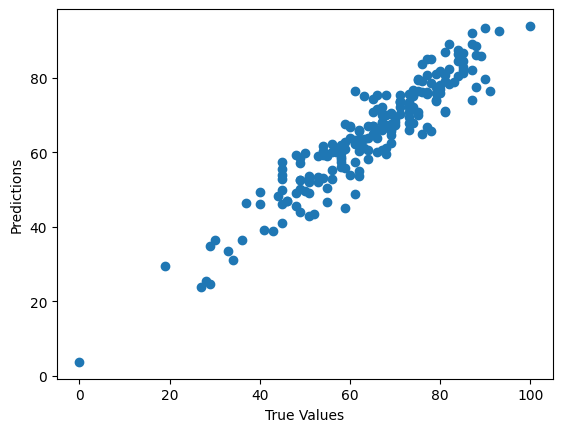

In [65]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

Text(0, 0.5, 'Predictions')

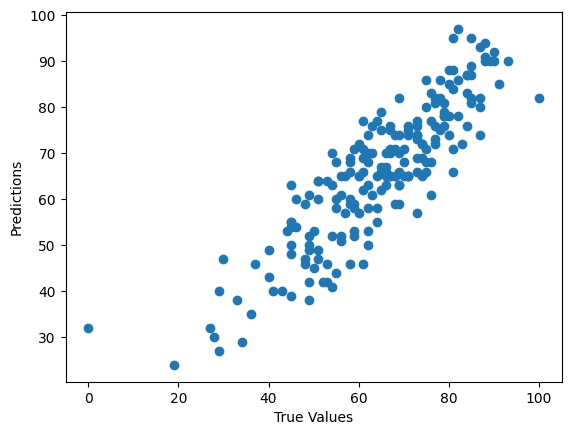

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

<Axes: xlabel='math_score'>

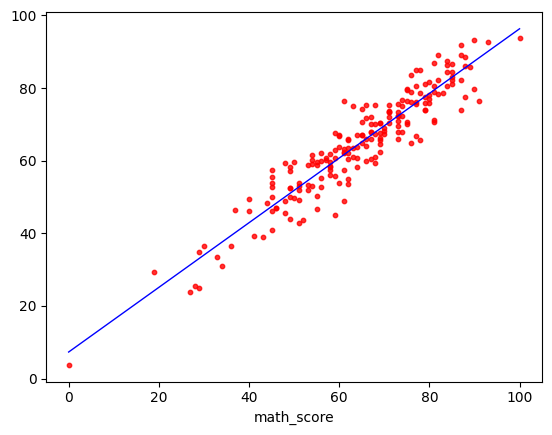

In [77]:
sns.regplot(x = y_test,y =  y_pred, ci=None,scatter_kws={'color':'r', 's':10}, line_kws={'color':'b', 'linewidth':1})

<Axes: xlabel='math_score'>

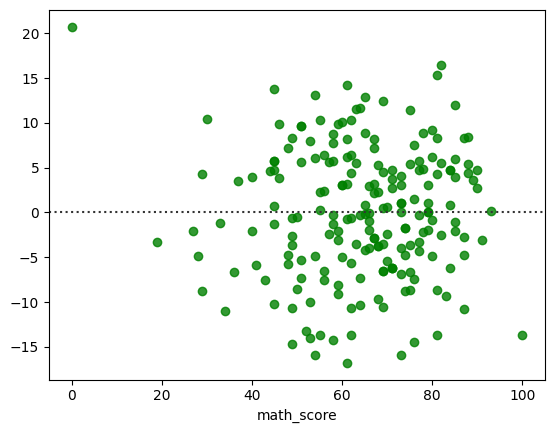

In [63]:
sns.residplot(x = y_test, y = y_pred, color="g")

## Difference Between Actual and Predicted Values

In [79]:
pred_df = pd.DataFrame({'True Values':y_test, 'Predictions':y_pred, 'Residuals':y_test-y_pred}).sort_values(by='Residuals', ascending=False)
pred_df

,True Values,Predictions,Residuals
521,91,76.507812,14.492188
265,59,45.117188,13.882812
859,87,74.085938,12.914062
867,61,48.773438,12.226562
199,78,65.781250,12.218750
...,...,...,...
816,45,55.437500,-10.437500
589,48,59.289062,-11.289062
318,63,75.195312,-12.195312
371,45,57.468750,-12.468750
